In [1]:
from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance
import numpy as np
rng = np.random.RandomState(0)
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score


from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.datasets import fetch_datasets

In [2]:
X, y= make_classification(n_samples=10000, n_features=20, n_informative=16, n_redundant=4, n_repeated=0, 
                           n_classes=2, weights=[0.95, 0.05], random_state=rng) 

In [3]:

data1 = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                           n_classes=2, weights=[0.95, 0.05], random_state=rng) 

data2 = make_classification(n_samples=10000, n_features=10, n_informative=6, n_redundant=2, n_repeated=2, 
                           n_classes=2, weights=[0.95, 0.05], random_state=rng)

data3 = make_classification(n_samples=10000, n_features=20, n_informative=16, n_redundant=2, n_repeated=2, 
                           n_classes=2, weights=[0.95, 0.05], random_state=rng)
list_datasets = []
list_datasets.append(data1)
list_datasets.append(data2)
list_datasets.append(data3)

In [5]:
for dataset in list_datasets:
    xx,yy = dataset
    print("X shape : ", xx.shape)
    print("y shape: ",yy.shape)
    labels = np.unique(yy)
    class_distrib = Counter(yy).most_common(len(labels))
    print(f"classes distribution {class_distrib}")

X shape :  (10000, 2)
y shape:  (10000,)
classes distribution [(0, 9454), (1, 546)]
X shape :  (10000, 10)
y shape:  (10000,)
classes distribution [(0, 9460), (1, 540)]
X shape :  (10000, 20)
y shape:  (10000,)
classes distribution [(0, 9452), (1, 548)]


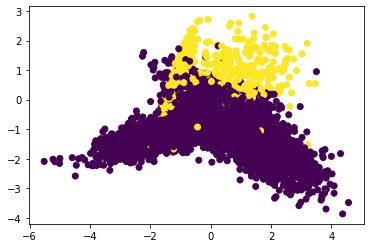

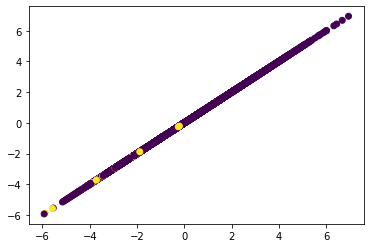

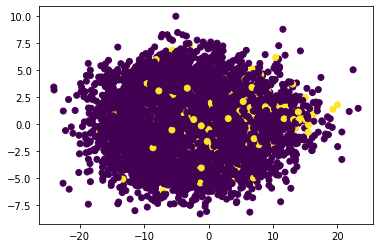

In [18]:
# pca = PCA(n_components=2)
# components = pca.fit_transform(X.shape[1])

for dataset in list_datasets:
    fig = plt.figure(3)
    ax1 = fig.add_subplot(111)
    X1,y1 = dataset
    ax1.scatter(X1[:,0],X1[:,1],c=y1)
    plt.show()

In [191]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.20, random_state=rng, stratify=y)

labels = np.unique(y_hold)
class_distrib = Counter(y_hold).most_common(len(labels))
print(f"classes distribution {class_distrib}")

classes distribution [(0, 1892), (1, 108)]


In [192]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [193]:
# classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)
# class_names = labels

Confusion matrix, without normalization
[[1892    0]
 [ 108    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


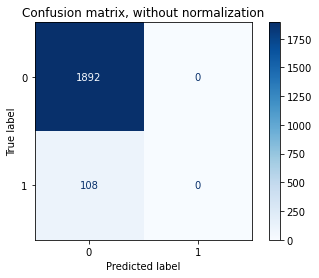

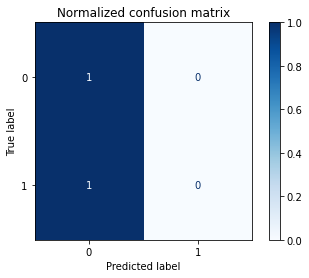

In [194]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_hold,
        y_hold,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [43]:
from sklearn.metrics import accuracy_score,f1_score,recall_score
y_pred  = clf.predict(X_hold)
print("accuracy ",accuracy_score(y_hold, y_pred))
print("f1 score ", f1_score(y_hold, y_pred, average="weighted"))
print("recall ",recall_score(y_hold, y_pred, average='weighted'))

accuracy  0.974
f1 score  0.9723674324627705
recall  0.974


In [44]:
from sklearn.metrics import fbeta_score, make_scorer
fbeta_score(y_hold, y_pred, average='weighted', beta=0.5)

0.9720126299091854

In [45]:
clf1 = BalancedRandomForestClassifier(n_estimators=100, random_state=rng)
clf1.fit(X, y)

BalancedRandomForestClassifier(random_state=RandomState(MT19937) at 0x1A953410B40)

In [46]:
X, y = make_classification(n_samples=10000, n_features=16, n_informative=10, n_redundant=2, n_repeated=0, 
                           n_classes=2, weights=[0.95, 0.05], random_state=rng) 

In [58]:
b_y_pred = clf1.predict(X_hold)
print("balance accuracy, ", balanced_accuracy_score(y_hold, b_y_pred))

balance accuracy,  0.5502701432933992


In [ ]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf1,
        X_hold,
        y_hold,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [48]:
def metrics(X, y, clf):
    y_hat = clf.predict(X)
    ret_metrics=[]
    ret_metrics.append(accuracy_score(y, y_hat))
    ret_metrics.append(precision_score(y, y_hat,zero_division=0))
    ret_metrics.append(recall_score(y, y_hat))
    ret_metrics.append(f1_score(y, y_hat))
    ret_metrics.append(fbeta_score(y, y_hat, beta=0.5))
    ret_metrics.append(balanced_accuracy_score(y, y_hat))
    return ret_metrics


def train_standard(X, y, clf):

    model = clf

    # we store metrics there before averaging at the end
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1score_list = []
    fbetascore_list = []
    balanced_accuracy_list = []

    # Defines Stratified K-fold in order to keep
    # the class balance for each fold
    st_k_fold = StratifiedKFold(n_splits=4)
   
    # get metrics for each fold
    for train_idx, test_idx in st_k_fold.split(X, y):
        
        # Training fold
        x_train_fold = X[train_idx]
        y_train_fold = y[train_idx]
        
        # Testing fold
        x_test_fold = X[test_idx]
        y_test_fold = y[test_idx]

        # Train
        model.fit(x_train_fold, y_train_fold)
        
        # Get metrics
        fold_metrics = metrics(x_test_fold, y_test_fold, model)

        # Save metrics
        accuracy_list.append(fold_metrics[0])
        precision_list.append(fold_metrics[1])
        recall_list.append(fold_metrics[2])
        f1score_list.append(fold_metrics[3])
        fbetascore_list.append(fold_metrics[4])
        balanced_accuracy_list.append(fold_metrics[5])
            

    # compute average metrics
    metrics_train = []
    metrics_train.append(np.mean(accuracy_list))
    metrics_train.append(np.mean(precision_list))
    metrics_train.append(np.mean(recall_list))
    metrics_train.append(np.mean(f1score_list))
    metrics_train.append(np.mean(fbetascore_list))
    metrics_train.append(np.mean(balanced_accuracy_list))
    
    # retrain on the whole train dataset 
    model.fit(X, y)
    return (model, metrics_train)

In [49]:
# try different data augmentation strategies.
# returns size of dataset, trained model, and metrics.

# trains the classifier without touching the data.
def dummy_clf(x, y, clf):
    return (x.shape[0], train_standard(x, y, clf))

# Applies Random Undersampling then trains the classifier
def under_sampler(x, y, clf):
    rus = RandomUnderSampler(random_state=rng)
    rx, ry = rus.fit_resample(x, y)
    return (rx.shape[0], train_standard(rx, ry, clf))

# Applies Random Undersampling then trains the classifier
def over_sampler(x, y, clf):
    ros = RandomOverSampler(random_state=rng)
    rx, ry = ros.fit_resample(x, y)
    return (rx.shape[0], train_standard(rx, ry, clf))

# Applies Synthetic Data Augmentation through SMOTE then trains the classifier
def smote(x, y, clf):
    smote= SMOTE(random_state=rng)
    rx, ry = smote.fit_resample(x, y)
    return (rx.shape[0], train_standard(rx, ry, clf))

In [69]:
clfs = []
clfs.append(RandomForestClassifier(max_depth=3, random_state=rng))
clfs.append(RandomForestClassifier(max_depth=3, class_weight="balanced", random_state=rng))
#clfs.append(make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=rng)))
#clfs.append(make_pipeline(StandardScaler(), SVC(gamma='auto', class_weight="balanced", random_state=rng)))
clfs.append(BalancedRandomForestClassifier(n_estimators=100, random_state=rng))

In [70]:
size_hold_out = X_hold.shape[0]
for dataset in range(len(list_datasets)):
    x_data, y_data = list_datasets[dataset]
    X_train, X_hold, y_train, y_hold = train_test_split(x_data, y_data, test_size=0.20, random_state=rng, stratify=y)
    labels = np.unique(y_data)
    class_distrib = Counter(y_data).most_common(len(labels))
    print("\n")
    print(f"classes distribution {class_distrib}")
    for clf in clfs:
        print(f"dataset {dataset}\n"  "Model            t_acc t_pre t_rec t_f1  t_fb  t_bac t_size")
       
        #
        (size_train, (best_clf, metrics_train)) = dummy_clf(X_train, y_train, clf)
        metrics_hold_out = metrics(X_hold, y_hold, best_clf)
        print(f"{str(clf)[:10]} dummy {metrics_train[0]:.3f} {metrics_train[1]:.3f} {metrics_train[2]:.3f} {metrics_train[3]:.3f} {metrics_train[4]:.3f} {metrics_train[5]:.3f} {size_train:>5d}")
        
        (size_train, (best_clf, metrics_train)) = under_sampler(X_train, y_train, clf)
        metrics_hold_out = metrics(X_hold, y_hold, best_clf)
        print(f"{str(clf)[:10]} under {metrics_train[0]:.3f} {metrics_train[1]:.3f} {metrics_train[2]:.3f} {metrics_train[3]:.3f} {metrics_train[4]:.3f} {metrics_train[5]:.3f} {size_train:>5d}")
        #
        (size_train, (best_clf, metrics_train)) = over_sampler(X_train, y_train, clf)
        metrics_hold_out = metrics(X_hold, y_hold, best_clf)
        print(f"{str(clf)[0:10]} over  {metrics_train[0]:.3f} {metrics_train[1]:.3f} {metrics_train[2]:.3f} {metrics_train[3]:.3f} {metrics_train[4]:.3f} {metrics_train[5]:.3f} {size_train:>5d}")
        #
        (size_train, (best_clf, metrics_train)) = smote(X_train, y_train, clf)
        metrics_hold_out = metrics(X_hold, y_hold, best_clf)
        print(f"{str(clf)[0:10]} smote {metrics_train[0]:.3f} {metrics_train[1]:.3f} {metrics_train[2]:.3f} {metrics_train[3]:.3f} {metrics_train[4]:.3f} {metrics_train[5]:.3f} {size_train:>5d}")




classes distribution [(0, 9454), (1, 546)]
dataset 0
Model            t_acc t_pre t_rec t_f1  t_fb  t_bac t_size
RandomFore dummy 0.975 0.821 0.713 0.763 0.796 0.852  8000
RandomFore under 0.910 0.942 0.875 0.906 0.927 0.910   900
RandomFore over  0.918 0.951 0.881 0.915 0.936 0.918 15100
RandomFore smote 0.914 0.938 0.887 0.912 0.928 0.914 15100
dataset 0
Model            t_acc t_pre t_rec t_f1  t_fb  t_bac t_size
RandomFore dummy 0.948 0.525 0.867 0.653 0.569 0.910  8000
RandomFore under 0.903 0.928 0.875 0.900 0.916 0.903   900
RandomFore over  0.919 0.950 0.883 0.916 0.936 0.919 15100
RandomFore smote 0.916 0.949 0.880 0.913 0.935 0.916 15100
dataset 0
Model            t_acc t_pre t_rec t_f1  t_fb  t_bac t_size
BalancedRa dummy 0.951 0.542 0.875 0.670 0.587 0.916  8000
BalancedRa under 0.913 0.952 0.871 0.909 0.934 0.913   900
BalancedRa over  0.993 0.987 1.000 0.993 0.989 0.993 15100
BalancedRa smote 0.933 0.950 0.914 0.932 0.943 0.933 15100


classes distribution [(0, 9460), (1